# Tv show analysis Advanced plots using

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as image
import urllib.request
from PIL import Image

In [2]:
data = pd.read_csv('../input/best-tv-shows-of-all-time/metacritic best tv shows of all time.csv')

In [3]:
data.head()

,rank,title,release,summary,metascore,userscore,link,img_url
0,1,Rectify: Season 4,"October 26, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,https://www.metacritic.com/tv/rectify/season-4,https://static.metacritic.com/images/products/...
1,2,The Larry Sanders Show: Season 4,"July 19, 1995",Comic Garry Shandling draws upon his own talk ...,99,5.8,https://www.metacritic.com/tv/the-larry-sander...,https://static.metacritic.com/images/products/...
2,3,Murder One: Season 1,"September 19, 1995",One of several crime and law dramas created by...,99,6.4,https://www.metacritic.com/tv/murder-one/season-1,https://static.metacritic.com/images/products/...
3,4,The Larry Sanders Show: Season 6,"March 15, 1998",Comic Garry Shandling draws upon his own talk ...,99,5.5,https://www.metacritic.com/tv/the-larry-sander...,https://static.metacritic.com/images/products/...
4,5,Breaking Bad: Season 5,"July 15, 2012",The final season for the award-winning drama b...,99,9.6,https://www.metacritic.com/tv/breaking-bad/sea...,https://static.metacritic.com/images/products/...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       3084 non-null   int64 
 1   title      3084 non-null   object
 2   release    3084 non-null   object
 3   summary    3084 non-null   object
 4   metascore  3084 non-null   int64 
 5   userscore  3084 non-null   object
 6   link       3084 non-null   object
 7   img_url    3084 non-null   object
dtypes: int64(2), object(6)
memory usage: 192.9+ KB


In [5]:
data.isnull().sum()

rank         0
title        0
release      0
summary      0
metascore    0
userscore    0
link         0
img_url      0
dtype: int64

In [6]:
data['rank'].unique()

array([   1,    2,    3, ..., 3082, 3083, 3084])

In [7]:
data[['month','Year']]  =data['release'].str.split(',',expand = True)

In [8]:
data.head(1)

,rank,title,release,summary,metascore,userscore,link,img_url,month,Year
0,1,Rectify: Season 4,"October 26, 2016",Daniel tries to start a new life outside of Pa...,99,8.7,https://www.metacritic.com/tv/rectify/season-4,https://static.metacritic.com/images/products/...,October 26,2016


In [9]:
urllib.request.urlretrieve('https://media.istockphoto.com/photos/online-streaming-with-tablet-pc-picture-id1208363215?k=20&m=1208363215&s=612x612&w=0&h=PX_J64hTqQpkdvc6MwUmtSrJMF1Zjj6dUMSgBKou2jo=','image.jpg')

('image.jpg', <http.client.HTTPMessage at 0x7ff705cf5210>)

In [10]:
urllib.request.urlretrieve('https://images.unsplash.com/photo-1560169897-fc0cdbdfa4d5?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8MXx8dHYlMjBzaG93fGVufDB8fDB8fA%3D%3D&w=1000&q=80','image1.jpg')

('image1.jpg', <http.client.HTTPMessage at 0x7ff705cf5d10>)

In [11]:
urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxQUExYUFBQXFhYYGSEcGRkYGSEfIxseIRkfIiEkHxsfISoiGxwnISEZIzMjJywtMDAwHiE2OzYuOiovMC0BCwsLDw4PHBERHC8nIicvMi8xLy8xLzIvNC8vLS8vLzEvMS8vLzEvLzEvLy8vLy8vLy8vLy8vLy8vLy8vLy8vL//AABEIAKgBLAMBIgACEQEDEQH/xAAcAAACAgMBAQAAAAAAAAAAAAAFBgQHAAIDAQj/xABKEAACAQIEAwUFBgMECAQHAQABAhEDIQAEEjEFBkETIlFhcQcygZGhI0JSscHRFGLwM3KS4RUWJEOiwtLxU3OCsjZjdIOTo+IX/8QAGgEAAwEBAQEAAAAAAAAAAAAAAQIDBAAFBv/EACwRAAMAAQQBBAEDBAMBAAAAAAABAhEDEiExQQQTIlFhMoGhBXGx8JHh8UL/2gAMAwEAAhEDEQA/AFXKVEVE/iKC1KhJAKKFIggiSrJN/X0w38LSlUpooJpteVI1i5PUrcb/AHhbFY1OIVabK1fLPKDuk6kuDM3B1YJcJ5wpU6bpFRCUYKYDd5liSd/piWK7LVh8Mfqecp6CXYDRMMbW+tja3jGBPEOYMqhj32PSms/Ww+uEUZoVJ+3W/RyVFtrERiRTy1TTrUowv7rgnzjAU0jXoz6e1iq5/sPfDqlOop7RjTy5Gk6u60He5JsPL5YijhI0A03EEWiIMiPMYRKmYuQZkWvNsGqPEQFy4MlFMvHr1+HjgTwyvqfTQtN0qzj6AfDuDtVq1SNlqEH5nD1TUAIlamk2IYddJMdLNf428Mbex7sK9CvReO1NQ1BaCFKqJU9YIMjzHjjznbVlzojUQRJBFgfdJG4m8ehvbCaibrBk0qlS/sNVs8tKmakLIFpXfy+OEnIVw9csq6AzEhRssmYHkMatxoVaQQmGH1+PXEZQ9DRVZTpb3Z6+mFiXKYbvfjBYnA2bQN41eODhAwi8tc0q32WnS/3ZNmn8owepcWqCqtOqqQ5hWSYnznD1SWE2CU3yC17+aq6wQwIAgxaP2g3jc4JZnL9x4iSO6doPSbG09ccOYKZSoaoBsABPlEj88deW6TZpxbuqZJI2Pl53xFpt5RWalLkr/hmteMLqjWCQY6kUT+eLWVb2IE7jcYrauqDjzqGGkO66iwgEUSN/I/XFgZ+mEoVXVwStNiAoU3Ck7zMT5Y3wuFkwXXyeCsuYGodu/YiArnU1oLCBa3uiDHjqJ8MceLZjUFANgCYHRjvbpsLbCbYCUKkFQZ2j64NVsm8hWUhmWRPUbeNr9DGDSyhofJe3J2X/ANkp/wB+r08a9TCR7ZOYa1LsctSqNTlWaoUMFhICidwLObRPww28q8WUKmW0tq7zSI6uzeMgQQJ8T4XxVntFVs3xOotNTKpoEnfQjOx/lG4jxHicBfkSuwDktajvNqgSJn+umB2Wz9ShU1UajU2U2ZTHwPiPI2x2XME0zHgL/XA1nkicPwdnPYU5t4ma9Za0BS2kx0BFKkD8JBwWfioqUeyPeqsfuKYMPNvgMKedbuoPAt+mCVGuUggLbr1N5+WJtHZwMHBOVM1mSxppAQrqlghMzZSQRqgdYGJFIhK9TsQ1WnTJpuaiA6ZgCQRK3V+9EyI9bI9jWWRKFViYNV9SSRGnQolfHvageo0wcRG5Sahm8zW0h6GYeVBdFU6iTBDe8ZJIjcHC1PA034AeR5hVNCqlHug7wTOoG8ASPhiXm+ZkzFKpRACsxBUqx+60sCNPh57xhtp5nLyVFagCs6h2iysbyAbRjnnFy1elBrUypIAZCSQxMiCAeo2uDGxxHZOctFCrQ1FDUoJT7c1V0rUYQV1W7okkEEkW3ONOJZcg3/B/1/tg7wzkyqmZZKTrVAM6wPEdRspEkYEc4BkzNRA09mAkwCNriCCLaomN5NsW2pIzq71LaXSFbmBe4fh+mHTmGrq4LQMTCUhM+7CgTHU2j0Jwq8fzKmhp7IBhEuGMt3huDIsLWjD7ycgrZHLo9MPTIGqWiNFQxbqJUWxy6K9UVfwNqiuGpprIO30gz0OGnMdvUqKO9Sc7B5UiL7xcdRgpx/gS5PshSkoVjUd9QJJn1BHyPhgxkeI0q1IrWZFjq8R8Z6Y6YVPPk0TWJx4POHZ+q4y/8SyVKZNgROltWmWDTKgTc238sPeqk1E6GB0m0LAMQG0xtE7QNsUwvEqGVzHaJWQybmn39jBBIswI2+PXY3W9q1BF0UMtUa5MM2kFju33iTvvgtt5loSlKSef2HXNYDVQJ2GEDO+0bN1J7OnTpD0JI+JMfTAb/WLMv3mzTA+EfsIxFaVA9xD3ydVaqBWbSbMJBMyDp22264ZcxwbLVkJelSZvFgJ+Fp+uKSTOgElR2YkaQpNh67k+fjixeXKlb+HV6hqrrUwQRcTZjqU793qLMfg+puUpS8cmrS1VU7WSM3ydw9hPZlD1KubfAmAPlgJmfZ7T1DscywP8yzHxBB+Qw45eq1QEBlvMAnbb8JNvX6Y7ZWmA2kqAx2K72HhAM77zhHdIT248oQK3s+zoUVBWpMG21OQSb9GX9ccc9lM/SpFquVVkC++oDQIiZRiAB5jD9ztVamMudZQd+LwSQF8QZ3i/jjXiVN6fCa3aNLNTZun3zIBi03xin1lpS+Hl468ZHv08uO3xz3wVXypxKtl61OvSpu/ZtfSDBBF1MDqP0OD/ABjmmhUzVSs9GsiVqYWojATqUjSRcWgRHljT2fD7Jz/8yP8AhGLwyGVr1KVM6qDhlELUQWA2BIGPReG2jEltSZ84Us1R7WdbCnqt3bx6YdK/E+H5hKavXIKeIKmI2krEbYP8QoZdmqtWoobiFCqBc3iQbDoMQuGcqUc0/ZU6FPVpLExptbqOt8TaT+ys5leBP4dm6NPNM6OOyVoXvAm9hAJlh6bYY+N8dpOaS07sratUi3pG5ONuN8gUcuQKtLs5201GP6nAunyJRqFuzNWFFyIIHr3bbHHVEt8hnUpLCwdOY6+YzDU0pBy6vbTO5AuSLKo2BPUN4HHTh3EavD6GYkFcxXbSp8FXdxO+9vhgOvLL02Ip5ipTIsRBB+jDGvEOXMwRrfNagB71UvYDzIb5YZJJYJVltvAv5DLNVzARVLsxNupsT1+eGfPcs1aVJneho0qSdWgEW3C+9gFw3huYGdFCk4WuGZQwYiCFMw0SLT0w3VeUOLupR66srCCGqEyPiuLpZRLOBJHuz1Ugj4Yd+GVlqtScGagUgCdvEkbmP2xAHs14h+Kl/jP/AE47ZL2ecSpHVTqUkMRIqdP8ODhhVpBD+IzNP7SmayOSynTKkKIIk7eJ/fELMcRdizdsVZ1bVUMEkOIO6k7eGk+YxJ/1O4u9/wCIpt59pP8AyYFcW5QzdABq+Yy9MMbaqsT6DR+WBKx2c6T6ANUAArbwnb9JxF7EiGMETfDXQ9nedqKro9B1YSrCrII8R3cdf/8AN+IRE0o/8z/+cMJkUuOJDiNonB/h3CS94hfH9vHEPmLlrMZZ6S1yhNSQpVpiCoM2Ee8MO1T2XZ4Aa86B0CprPyuoxKuOys19DVyTm6NDK1adVSyISQhGrUCDIvbcHfxws08lTp5ujpbsKLMtbs2q91QSXCgWWFIgWtAvjen7Hqj6RUzlU6vu9ifDxaqR18MKPMfAshl3NJKtas6xraURR5DusSw6+G3TAaysJgTxWcDHluYqFIuyrllLklj2pYmSZm9pkyBjylztl1WqjdisgFeyWpdgwiTcC0425G5R4bmwwKVu0QSQ9YQV2lStMGx3B8RczY/nOS+E0qi0jQBZrLqq1jfTqNkImFk7iYi04TZGfyM9SmsPr9vII4L7TMvlZIJqBm7yrS3HTvkqSRff8XlGFvjPOuXru7mjUJZiwPdBEkneTiyuB8t8ONVU/haLSDB7NoMAz75YteL434xwnLU6uihlaCvqju0FA06ATJt5+J/PDPpvsELlJcFFcR4sKilRTieuqdj4RgxwLnHM0aC0aCKQgYlirMYlmJgGAAJ38MOfOXK3YcOqupptKq3d3C9ouKsymbdFYKYDjSRAMj4gx6iDinC6YHufNL/wP53iefzSDtKwKEyFVksZgd2n3gd4nwOIVXl51KmszorgFHZTDSJgSb4k8rU21NVUACipdmYdz3WK6jMhi0AEfphxz/FUq5YjNGo1R4MCwImRoDnTTnumQOhscDKXIu2m2s/2EpFy1OiUNJalU3WrqeN9tEi4FrjczgZTpGoGFgUFh43mPXc4K5daIPfRmCkkDXZjECSBtIOxnpOOVKvSBLIpGoQAYIW+87mBAvh1hkadSs+QZQUm5O31x1SjTvfr/XTHI9yQfzBi0i4kf1fBIcN7qMXC611AQxsSfwqQNtpwjXJXPA55/l7LvmMtU7MKHrEVAs6XUKzbeekzG8nFl1lpVENNlUoRpIIsRER8sJ2TZDVoUmXvKhq2PumAg+et/lidza7DKV9M2SxU3tvB6HzwlrDSPTuJlvH+8FU0uL5jLuzU6jyGIEtqkBrSDuDGLn4DUDIKxGlmMDyE3A+M4p/lHIq9ZWqEnRDKkWMEbkGwBg7Yt7LVkYIpbQV+70m+xEW+ePO/qtNQpS77JaSeMk/ifB0r6S0mGEienWJss2+QwG9o7LT4bWXroUDaw7RR8umCGV5ioEOBUEoSt+t4keI/ywre0dnbJVqhHdIQAja9RCPUWx5WjN+5py8pJr/JXVyo/YWPZ3/Yt/5v/KuLa4bzPUFKmAiaQgADKZi2/e3xTnIlOKZcG/aEEE2gKpn13w91uKKELTMCdINzA2Hnj6G8qngzTipWRFzvEGOeqSpca2WIJhbzA8o1eqg9MXH7P6arVJFN1JpCSws1x7pkjx28sUbxejVfMaipRqzEAAyRJiDHqMXVW4jVoUqfZkawNIJWbdbQeow9UlhizLapAz218VSm+XVg8aKvuRNwFvPh+owb9nmW10q+slWfswSDBEU+h9ZxVPPHMdV64FYK7KAyFhGlrwYtI2MGxgeGHTlzmGolFSlNftEQsTPUWmSbEk3t0w76TwKpfKBPCEduM3WwqsXhSe6B57dJOLI5oy1Os1AQpjUdrRb9cJ+Q4yprVguglhFmkid4ufAXvbDFl82HqhQICU4gXAk/tGJZHUY5z/uCkuHZmoeLs9JZqGtVIG33Xne4tO+LryatoGv3uuKj5c/+IG/+or/RamLjc3xpiVnJlun0egYUOe+Jo2XqUUeWJAZVnxuCR0tBHqDhjz9UimxBgwY9Ytisc/kXXvKdVOLtHXrMEx8cO34FlZ5GTkLjA0uKh7OWARGPlcg+Bt8vnJ5pcCqlQ0zUKqywoBPeg9Qd4jpvhWoUZVYtMYbMoqB2FSqVqd3SxEhhAkEeNvHwxO2tuCsJukwlyflko5enREK1yUJEgsSxHwJweZMAFWkrhmYmNgAIn52+mPamcLsDrdQfBoG5/TBmuDtSMPgU/azRmplj4Cp+dPFocQXXTdVYg9DGx0n53E33xWHOdMs1OWLAaokz+HFm8Qrk0G0nv2ufPCah0LwCVyVSjTaM2msvJnSIEH8RMGwuLX264TuO8Ao62bsu0d1l6msMNR+8BNp963ww58Ey6iWrUA4+45CQOhAGrWJPlFt+mIHNHDh/aUVCoQAUA2gbgAbRjNVccGrS0mqeeRN9m2Q7Cua1YhVCMApYDUTEb2I3t5DFh5huH1F1O9LVI3cyTGw7wJ8LWtbEPlOkKYZo7zCCw6LvvB3P5DB7OZhoUU1FTr76qVufxf3vpht2eRNTScv8AnhuXyy5lDRrKSGPcUbSGsZJNgf+HA3mF1/iKjCt3g0aN4HZLqIEj7oOJ6Z+MzTR6IRqjgau6TI8xc79MGeI8CogVCqg1Kky7XIkEd1dhvvvikPEtY7EeXUvPX4/gpbiWfrVsvWO4FMyAx0hQReGvbwGEHLrMXjF0VOVKlHJ52q8AihVteI0nbxJsb7Dz2pJcGF8Ttas1wN/CsinZ1O2LJTVhqC37QAGV1TYTF/Podtsu9fPZglVKoP+EdBba0W9cb8IpnMqEDBUSLdbz8zvhy5YT+AFRwWekwllIEqwMSLe6RvO2HUNmetZSu+SdwvlinRp1Hp06b1mFmqKGBb0JhSSYsJ3whVeL0GLCrlqamSD2Y7LvDfbukjzGGrOcZapL09agnbVa/ht0/PCzmOHKtY5io27DQk3aqfH+UQGPjPrjsYDuVJ5WQJxThq0yCusHVDU6oh1+IsRv0U7WO+OBzR21bW93w/L0wQ4wbhySzFpLE3JO59euBeZpd7+v2xzTXYJafRYPJvEBXzuYbdSgRPJQTcevvR54J8w5kijWV40hWG+9oA8pkDCPwnJ8QyVTtloagQJ6gj4G3xxy4tzY1Z07SkUVaitUAM6gpEiCBG3jvhXzWUegtadr3dkzhGbRK1VTRQAiEhBKDUbSN5BUyfLD1wjh9OrT7SCs+ZBjr1sMKVDmHhruXZGRiIMofn3Jvg/kOL5XQVp5hYOymp0jbSxmN8Yv6gm9L4J5z/A2m56TNcxy6jQytplpPid4wO5wVk4c6MxsyKoG0TN7b79cMuTMqSSN5kX848/DCh7R6FQUQ7FYLhYEzsxv8jjH6GbvUxT4X39lNV/Bk32cZukuUFKrSEtUZkqaZI90GPxAGLT1w8u/wDDau4lwAh0gWMzMdRYb4Q+R6Pa8PVfdqUqpqoT1XUNQ9DpPxC4a+KtVr5djQbUwQxTIF2j7p3nyNserecmOHwVRzbnQc3UFJiKQYAQdrDVHkDqjF3cqZfXlKDFmaECyxkmLSTij8vTRaQFWnpJMkuCpPhBMHaNvPD/AMB55OXp01KIaSiwKkd07QygqfGYGBTXX0NC8/Y5cV4PTerTDQZte+zqx+gjALnuimWQaAF1ggz+EFbAecxbDby/zPRzTFKWpairqZGTSQJ3mIIuMS24W1Q1FrEV6LGRTdZCnymcIqwxs/ZSvDWPb9vTqaQr2hYufei8EAGOm+H3/SihO1b+2J2UgW/mjr1+ON+P8m5ekoNLMJQIM9lUbUDJk6blx/xYXuD8QyVRtFQkVQSCC5WTN9ImGH1w7p0GVK6FLkqpr40H8atZvmlTFzVGvineTCP9NsRt2laPSHxZvEOPZekxWpWRWG4O+NcdGDU/Ua8bqfZPbocJvAndKTalZyXLMZBiYHWZ8ItsTPiezvHsrUUqa6wR0n9sa8P4YV1pSVmJUmACTaOg9cLf2hoXOGDOBZ5RUC6Vufwx8PHDFTIWurlTpYbHb4b+WAHC8vQBX3tQ3sd+uHOtT1rQMEBjpDQYBtuemFfA84BeazXfJAAWdpH5bxjtRekytqpiRuwERPpY44ZxqaVXVgSVYgkdSDHjiYtFf4Zq3eA16QsTNrmZt1+WC8tHLCYv8bpoQmkz703nwxYSyyEEASNh/U4rzOspjSCN9/hhnyfHGZtGnoZPjHltha6DJMy2ZEimfG3ynBihlA9iYESbThez4Wgpq1CSotCrNzYSxgSPjg/y1nC0kgkFRsPzA2xnccmp6mU2jmckhLKC7aCQdCwAR02ifjgS1anl1qdo7o5W6ldgIAKnabi37YLcFdhVzSQSRV1xBkB5ImQI2wtc85JzUeoUOjsO8eg0sSYInvRED1wXBP3G+2L/AAridU16jNVfTpBR3UHvDwinKkwJPnbbHj825inmEY5guASpVj3W7wvpCraDAPl06qr03p0xU7NhKBmAquAS02ADRaL4m8C4V2tZCaWkEOSGLNIVgLyZFyDAwJrdfxz9Y4KVpXOm8rjvJY3H84a3D8zJN6FSALD+yJ+PxnHzapx9BvSanlqtOdX2LCTb7hxQuSAm4F7SdhIj9z8MaFLnsxulXQxcmZgq7DxCEfA3/MYsVHGlp+HntireXyBWPTux08j4+RxYDcTpCl3qqKZ6sB+ZxaHwYtefka16dNWYBgADt4T4npG174EcbyPbqadNhrXvjfp1J+5Im5jBDL8ayUfb5mIsAqs/lYrOj4Rvgvl/aTwygvZ0aVZ5BHcpqAZ8ZYG/W2BWGPp7pngrXKVhVosGEspn4Hr8wfniFmVlt8e5MuHJSmdLKVg92QfM2mwOPa2SrkzoAm8ah++EeWVjCbLk4VmgFCVKwaobCwFwBaIE+uEjK0Vaq1Qi2qo5j+8f3wU4bl6iV0DktLAKTue6SJWN4ESI2nEXgKhgJ2KGfiR1+eI+3UVhmnKc8DhyvwLJ1O0FfL0nawAdASIBm4FunXAvnv2fZKlS10aZpNfZ2Ph0YmOuC3LULULMCKaqYZiYJOrVc7wI9PljrzbmA9GnpiHa0GQR4j6YO59C4Ebl32aPWDNTzTUSqyTpmbbSGWLx88QOduVc/l6GqvmFr0VcR32LSZAMMPM9Tvi4OVKSrRYndtvQET/XnhJ9sGZ/2Zkn76W+fy2+uCnyDwJWSHE6GUp5hacZUA6GK0yDreDP32luh29MTOHcY4rRAZcq7KQGH2DkQbgyuI9bjbmhk6JzA7FEH2bLCo2szrEHtJDHxtIgdZlLjOZVmVqiqVJHdVIEG8Qu3hisw6eAbsEfMcycQ1M7ZUrqMsopVApPUw0iT1/zxHXnusljSUGLWA+Urhk4bzBX0Vmes2lELWtfSxHux1AxBzlPiFR6ZpVXIgMKTOSEKrJgeAEm20Hywlype2h5VUsoicL9ohWprrLVYBSAFqbHpFhtgxS9plBx9uc23kGGn4gOJxpmeZKuogpRaDHeTVt6nHmRzaVTU15fLnRSZ7UKd4i0lTa+Gfp3jdj+Qb30d63OHDiCabVE/lanN/JgT9cLVWtkC2qnV0NM3V4nyMSMEXr5c75Oj6AAf+1Rjrn+G5JOzJyak1KYe1WoNM9PejpvbHexSfX+Dt+UAOSeI0qXEBWqVAqfad4zF1IHnecOfEeMcOq1GY1aRJ6lTP8A7cVicur5g00GhWq6VFzpBeBvcxiyH9nGWoU6b1KtWozNpIEKNpsAC3Q9cLdqeGLMOnlHgzGQO1Wn/hP7YZuWuZMtl+2rNXVitJiikMSzbgC1uo+Iwn8xctZegKLUg4169QZibqVFpE9cCOKUlp0bbsYF/nhZtPoLlrsB1c7ULl9feYkm/U+mJNDjOZEAV3A8nb98DXUzdJ9Md0prYMjgR93efji25k9q+gt/pzMk3ruSepM/MnE+jzXnEAT+IYreF1CBMzaOsn5nCzpSdnCT8Y9MasFk6NRH82Oy/s7ag/W47Xa2q/jqH7YbuReMDsKjVW1VQ5CsZJKlRaY8ZxWTLTtpLk9dQtizvZVwanXoV2qvoVHu09NC/vhW+AzKT4C2X4zRDfbK7KTcgmY6wJ36Yl1vaJlqVRWpZdlT74VUUsNJAvqveDfEHPPlkJC0TUAPvFzBv5D+pw0cA4HkMxl9aUULAwwe8Hw3wvfgfOBEq+09UzGZrLl3Za3Z6VLhSvZqRcgHck4Fce9qFSvTNNcroBDAntC0gqR+AbTOLgXlXIkgNlqXpGN6/IXDiDOUp7dCw/JsBcnZPnqvzdmGDgLAYRcCQBNg2kHqbzPnjMnztnae3Zm0AmmthM9In4z0xeWc9m3DSk/w5QkWIq1LEi1u0P5YrnP8K4Xlz2WYy9arWIkpQdu4DsSWYLJ3AuYvtGBMzLykl+Qum1jIo5jnfPuCDWABEECmn/SThfyodlKBoWQxBNpAIB9bkfHDHzNQyaOTlO0alpH9t7yt95SIGx9fU4C8HaNe0EDf4xh5rc+SdfGeCZ/q6wVWepTUsAQhYBiDsYPj0Bv5Y2y/D6AALSfEEkR8gJw8ckZ2mis7EqK4IeVUyoGkgMwIAsSJF7jphIKwoBsY2I6QPliiSbawTvKSeeyWMvQEBaYImNTfePxm3pjK1bRYKoHgPPbHJCIG1pMHraBA8fPGlcrNgYi8+vj1+GCkiXL7GjkXlcZ+uaJqNTWnTDOy3MTAChrAmRc+GCXMXIYp1itPOUWSLdoGDC5EHQCp23t6Y48hZj+HNXMOWSm9Psy3VjKmw/CIuxixIBm2Gk1qRCl3ooSoMQrW6HUDe0b3xO7wzVHpncptCnVq1KtClWUntaUK9xbqjkFh1setxjrl6weasBGPdqKNg28qRaGnbxB8cKfLFYZcLUrKrZfMhqbjrAkTA2v13G/qy0crSpI1RTJQqTTFldWDgFibGImJmTuAcSp4ovM7pyTa/FqqUyqVmUfhDGLnqNr3tiby5l8s1Idu8AKSvfIiWJ8d9sEOVOO5LMUaismVp1F/8Wko0yO6PtN2J1GRItEXnC8OEaahrVszRy7Ef+HTFgZELcBTe9/PFYrb2iLnPR0ynEWFVlao7UkVgiioQFLoASWF23YxNjcYQuZszW76moz0i5I7xYCDaSdjh/5k5ryxPZU+yqt2IK1aUDQ+oi5UDV4lSvUeeEnmjPyhpADSpVR/6RB+bTfrvhH+rI//AM4G/wBn/BV/h1qVKIzCVacaITukO0TrYD8Jt4r1OMXOVjUq6GkFamhG+4Ce5AgwRIgW6XGOfIvEly1Ok4+8ihgZ2NRxqBGwWAYg+95YicRzDKzPSAmoxUApLd5pGk7zMCLztfY0Wctrkm10uSRmC75Op2kFjUCzt3S1MdBcd47+OJ2VrsjBlbSwm496Yg33iOm1z4414ZTr9g618u1JFUHU4ILElI7pj8KmRa/kceGmIBHveXW+3mTtGMvqHmka/TL4fI15j5cqoWqzqAVTf8BRQhE9IkR00nwxG4Jw6oFrtok9mUCHckkHYEGCAbgjDgMs7Zfs9NZqi0kp98glgrbXmLarxPnYHAFcg9PtDpZSVAHeBJOoHcbWjG2dTEKcma5e/j/WCsxkwtKk/wDDSXDFtLVCBBGmO8YkEG+PebKEV1poCQtNVHUwC36Rhsy1FewNJmtYMRuYMWIsBeJPSCYwO4vlylVKijUCswSBEDaSd7i2++KvdK3d/wDZS9FzGV+MlTZOoEziM1gtcFiegFSTPpiwqXPYzNbRUApZddbAgnVYHSb2nYwBva84rbiMtXqQDJqtAFzJY2Hjjs1GkqH7QmrawEAbSPMi+8DGO5VPkSW10Nud5p/iWp0ymlaZcU/HSxBAfpqsNvHArmKtLInQCT8f8owIo5hyELMzBCFUEkhesCfdHkMSc7mGZ3ZRN/oLYEwk+AN57OP8KlyKvwxJy+TYjUtZVkRE44I7CNSAHpI6frgpSyuWZVapW0ki6qm3rviils7UpPG1Y/k14XwSrVLdnVpg0zcsd/S19secR4PVSoFqVKZdxIKmwjxtiQmRyrWXMkHzH/bA2qFVyoiqJgG9/S+F20qy3wcnO3Hk3zuUqAAvVRgoCgLEx8BfFg+zy3DcyQ2lu3HxGgfrGKwWsJ9wD+vXFmezrhy1MvLtplnK/wA0RIBnfbDVhioasjT/ANnEaSCLyJvP/fA3lHi9LKVq/aBiJgaANwfEsBgxSyCpR0qSbkjVffAluRlq0mftHFRiSJIIJk7iJg+uJw02VtPahwp815TVrOZpAQIBaCLXnrON/wDX3IKe9mqfnBnp6Yoapwt+3FBhpftBTPkSYnz8cNHNOTpHKVBTCg5d1XTF1llHlMqwM9TPXDNpPBNJtNlg8S9pXD9hmFYfy7/Urit83nKdaq9em40M9zbYU1UTc+E4XuWOBJXDvUnTMLBj1P8Al674cuHcASmihVC2BIH4oF5Nz8cLWHwhpymm+iuubEC13QHUYUsfPSP+/wAcQeCOFLlgG0rIUixM6RPkNRPw8Jw+8R5QVmeoCZY6jPifqBhF4dlhqzCmdSISIP4aiz62nFYwmieom0zrmc4XOrU0kQRMCPCBaPLyxKGf1RTJOnz6Hy/rrgVoI/TE7hrKBUDIH1qFSdw2obdZsRbGkz4N6NJ3Bim0qSCIPyEb/wCWJtPg2aqAdxiqXUEGB4x0A28MNvB6tanSVWKrCjcTAJ6melhjfPcZ0BBVrAgkTAmJHQQfvWxmd84RVTOOQcr1KQpJUEQvu2sCT4W3E/HHjuoPu73xnF8z2tNagVhpkDUpEjUSDBvBM740ouCoPlhGsnuaNNQl+BOzOaDZWgn4Hqz/AMJ/5sTOFcZ0RTqLrURALR8Oo/qMAqqlYDBluTDCN4/YY1Did8BrJ5cU5Ceay5aFUkqTsR7trmOgvsMWxwullczSDdmXDWbtQTMGJva5BuOs3kYrPgnEFIZGI1lSEJi/kZ2xYOY4aKfDIy7ha1QSzKbjvSQDJItI3m5wjbb5Lykllc5BnOXJ9DJPRq0VlHnUrMSUsYi8xN7/AISJNxhC4nVqFIZrCO6AAB4bXjwnDAadYgNVqPUaNILXgbwCbxtbYdMCOM5puz7OUAkEhRckbT4/GcMnlkrjE5HHgNE1srSFOnqemiSY6TUJAPUSwkemGajy1rFGrqZGWoruNFwFYGNP3TA3vuCMD/ZyAmXDXnsZAnpJmB6gfTBnifEa9HMsVTtKRVQV2NpupLwDf8N4AnwmtR+45S/c7Hw7JnN76qNVySJ0lo6gvtPkLfLCjyLTJamdyFL96Wv7sTM7kR4YIcx8Rapl8y2lkXQiqrRIuZ2Nz6eWOPs8S6nwpH/3DFV0T8j1ROmWm4aZ8wAR+mIfNaGo47BAJNyLFjO4JsgETeCfgZ65vMpTlqjQN9iZt4Dc22wDocaatmKaKFClxp717EHaIkj5X8DiepW2HX0s/wDA6eGiXlGfauoWoLGCb7fdi02keh8MKfPPEaipTJovSXWYK/eMH70aSIm2/wAsN3FK5bMQJAJVbDpa2xOxN8E+dcn2uSzFMACFlbbaSGFvgcZtT+q1K05a/VjP7lHr+5NSvDwz5qaoTVLDcuSPWfK2OGkifLfEzLZJ6lRkWZEna9j4bi8YPcP5epgfbdoTOysiC3ie+T/hGNzpJkFLaBnDKP2dRj0YfNb/AFmMZluI9mRIDReD1PqN/jghxbKUaSAUtRLsZm8AQYmQGvF9IOOHDaQqo9IKO0F1PUjeBf4fHHT9nNY4IlZ2c6nMnoOg9BjFBJgCTt6nHLXpYq1jPX+t8bGn1BwwptEWIjHtOqyNrQwR8iPAjGmmLk49oI1RoX3RuTt4X/q/THHEnM8QUtNPuzdhbfD5ylxrL08klKqXDLUZwV3BnofTFeZ7sg+mkLAXb8R/TEygx0CMccWivOmWFianxX9sT6vNwCB0ug6qJC+sAx8cU/mabCQREYj5fO1KTaqbspHUH+pwqlLoLpst2hWyFSouZd1FQXk1IvG5HU+Zwc4dkOGOKx1U2Fb+0muYPwnu/CMVAmcWqhqBFFYbqoAD+YGwPj0wQ4RpImtTv4agB89zgqRXbLay3B+E0V0qKKgXjtm3+L45Zzi/DKZVdVI6iZKuSFgTeGm+2EamMrH9nRHwZvqSMQs3UyxBAVB/dSPqGnDbTt7HnM8e4cJh6RtO5vPT3pJxTvAzqz1fso73aabkCNc+BO3THfiFEKuulUPduVMmf8RMYD8FzFRcw709OuGIkWN5NpGA0DOUTKGXppmRTzFqIqfaFZsN4UgT/LMCMP8AzRndVbLU6dOiKaoxpVMvpUMLaSAZ0gAtIFpNidOEzjtNjFRiraoEqIG0ixJM774hcGr6KhpPU+xu2hyCkxY6GOmfOMUpZSYk1jKGrM16ZlSyagNi5kib2UjwB9ccBm5OpROglbyIEfzAHeDGN6XHKCi9SmIgQpG3otsL/E+YkNVuzPdJB1HxAjwmMTQzQ3ZTM5c0q38QSGZCE0xpDgSCSCZO0DrsemA2RrdwYALxgFDTgsSwK6ZPQzvB8OnjjutWqAP9nrbdUP7Y7hG/S1VKWX4LT4xkgtKmRpUu7KWYSAApuRI6rFyB3p8iPHDckyqlSglaqR/aUwAPVgZ0nbY3kWxHp8xJmQ1Cn3WILqXgSRMqDJA7pYz5YgjNFwiq6O7Mv4TBIWIgwRcCRMHfocZWq8HRsaxRh5TylW4pMtytiRcGDaY3xw4v7PqNNhoeophZhgYJEnpPh1w28JqUiFNNlYBr6TMGZM9RebHADnLmF6uZFCjFNiV1tGxKgAfST6xhlVE9qb4FqtyhUiFzD6fBgY+jfphd41wV6AUuysGJAiZtG8jzxY3C88C1SlUqIzUyIcQA6sJBAncXBGFj2jx9jBBB1mx/u4aLbeBLlINcD5a4wMvTbL1aYpPTDKJWdLiYOpbb+OOlfh/Hge8iVLRM0dh6EYtjl3L6cnlRG1CmP/1riHx2qVAAMScO8J5wKvopbmLP8QpoKWYREFQgi6yY9G2vvjtwTivE8uqtSyhdSsBhSdwRP4kMTIwLrcJrVszqqEkVHfvapOlHKkdYiIAxa/I3C6FJX7B2IYAspYkAiRIBFidieseWA7WcDLTeNwj57nrPNp7TJ6Yn7lQbx4nyxyyvtIq0qis2WEqZgsVm3ph+z+cp9sy6hIABwFyXOlEV3prSrVQtmZACBDCTBI7oMXwjatOWuOgbX2Lo9px7TtDlge8DHaeHQdzDfU55erTqFsv2RqoFh6muBDAnToEEhtj8sReYuMpUMU1GkHcqJJ/QYXKjziN+n0rctz1wuX0htOFOfzyamBIUBQTJgRJwO4jUKCZxMdowJ4zU7uLoo+ERKuaMraYXrO7GenlAxHq1CWDL3GGxBOPKedKEnx9enpjqvFJsQCD0xVIzN5MyhplicwWafD9TvicOF5JrjMOvkVmPTEGkKZEtVCteQR5/9zjjUKyYIImA3jh0+OgYJuYyWUUHTVdzFpHX0jEAV6gU0w0IdwOv9WwRrZRSAKZDtP3fSfH4YKZblUtTDOxUz7vl64WrQZhvoVgIxNXNKogmCB9YxO4nwI0/dJbzwHzaRMiNh9MDKDtfkZONcYyrjuOST/IRfruMLozSk2DH0GDPLTqiEsAZODI4tTHUD4/5YV1gO3ItZPOlCYpVD/6caHOZgk6KbDw7pw3UeKU3JCwTBtJ2+WNuH5M1KqILFiBJ82WT5wJPwx28GwWcvWzWmOx1Hxb9pGPWTOn/AHar/h/fDLnKgytapSrvqUH7NlQ94dQV+6Rb544U+N0mcKJ7xAHd6kx44HuD+0/oD5DgWervoUoD5wN/QHETgHLtStnv4Q1RSc6wXAJFlJIgRIMYtnk/JxmXG8R9CRhP4GmjmID+d/rQb98De9rf4F2oMZb2NJ/vM27DwWmBHzZvyxJzfsv4flqNSvVavUWmhYjWomBsAqgyfXD7xji1HLU+1ruEWYG5JPgoF2NjYeBwj8yc9ZTM5XMUUZ1dk7utIDQQYBBIBMdYxli9W35wM1KKl/hafRfmSf6OHLg/s6atRp1lqUgrrqgoSR5eeFJji8MklLJ5Smlaqqqi6SzWkmTYTe5Nr4vr3Upbe2U9Ppzbe7pBTlnhzUaS6qvaEgRpppTVRGyogt8STjXiOW1FDP3APzxpwPmmhm3qGk4a86YI02H4lUkGCZjefgQrZlFgObx9ASP0xkae5gcs+feBl+1TsY7RXDjU4Ud31In0HQnHbidKotfSumZHZlXUjT93vAwIAi+0QcAK1FwFO+qYHWxj88dcxlKi1exc3VtNrgX6eWPS8keBm5OqsufOsQdDhgI8vw2Nxv13xvkcrXTN1KrqzamaWmNUmRBG3T8umOHJdLszWqNcgikI/vS30Aw2HPdSpHqDjLrajVYPW9D6SNSN1N9i1Q4XWq1KlatRLrqWR3SwCOsRLAsCoYGPH5LPMtFEqKEpmmNAlTvPW/UTInrGLAcgtq7QgVO7pIBBA8vicK/tE4e9J6Rer2hdWIGmNNxbci/oMU0rzwzN6zRWnTwz6JyY00KQ8Kaj5IMIHtA5soUQEnU+4Ubn9h5nEXmTmh8xT7BU7JbAntbsu0xpEDxGKZzdQs7Ektc3O8A2+mKL5GNpyWFyi9SvT7VVDulQhlAAjVcER47T1jxxYvKufpPlalanUDkliyixQgQFK7qbTfxxSnI3MrZHMrVuabd2qvihO4/mXcfEdcN/FchQpZytmqLhu1OuloNgHQFiY96SWtt+i+2k2x/cqpUkVmfXWYyur3SfTeMQ8rTSkpVBE3PmY/LrHmceZnNEnfEXVhFOByW1QnGuvHENjcNOCHBlUSMLPEaxLaT0wyOYws8Reap8sNHYup0cC42OJNbswqaTJIlvIz+2OWTRWcaioHnjfiFJA5CxA2I64qQOVsHqXBg6KFW7R9RviJwvgjViJEDDzk8rTy6wgE4nd46K6em67M4Vwqll02GrHPN5qcc8xmScRWacSXPLL9LCPRUM4hcb4EKtM1afvqCSse8OsEXm2xnE2mmDPCKZJwc4BjKwyuMlmhoKAGR4euMqN44YOJZJaLmmQPeZli0hmJA+Ex8MBeJ5gLo9fp1wzeXwJM4XJK4DC1NTWXSwk+MYeuPZM5FcnWdvtajl2QiQtNdJuNyxkH5jzwB5H4atfNKakdjRBrVidtKdPDvGB6asac88wHOZk1Se7BCqDICg2P8A6hfAh57O10pfBL5zyCJn6CZjMLUSsEao1FSukVIUEai1hAceR6SMBuLcFfK5nsnI7pDq22pZBBHn0I6H54CZ5LiTMjx6AQB8Bb4Ys2s44twsVKd85kwAyj3nEQTG5DoARA95SPVqnjgOnbXfRP8AZ1nu1zdbeNCkE9e8dv664WY08y//AHPzy/8AngFwjiEZvJlelamfgXUfvgxzE5p8xBxE9pTIm/8AulHTE5bcPP0xNWUrwgv7UlevnaOXUEnsNVNR1dmebde7Ti3WOk4Vc7yrXp06lQ6WWn/aaRUOgwLP3IRr7MQYuYBGH3jOWr1M3l80sBqJhiCFMXgrMgkamsbGYPXEvi2WrVaNeke6lURrNVu8SxOp0VQvUmFMWUEAAQunqpTKQVpOk39C7yRyYjClmarh1gMlMCO8PxHqAeg3jwtiwMzkKdYqtVFcAlu8AYiPHqbD0nHblrlwZfL06TMxcKNRm0xeAZAGOPHeGFYfUSoEbCQd7+vw288T1tPUzuZWNWFG1dkbNUKVF6bUBSUAgMqQDFybC5JEj4YgcWzOuoWVNQ6G3ifPHWvQpBk1NADqSNYBYXt5iYnyn0xKzKUWM1U723vDaTGOjUSXy7NGm1ty1nHB891a5DI4gkXv/KbY2bPPUcu5GreQOuIlWtIsIjGqgkMQJgSfISB+oxuR5j7GTlapWdjpcqksahG8n9/0OG1HqxpNTUu1/D9/PfCxyKbVB5j8jhmFMht8YtZ/Jn0P9P0p9lU+WSOLZYCllmDffYGBe0E9R4D54W/alxDt61CFCwkQPNsEs1ni1Rac2QlvLvBRb5H6YXOb75miv8q/Vziul4PL9b+ul+Q6eLIHK6ipJJAhjBFxJn3R4RGFmjk6TZxlquqUtTMSTplTcAG97i3WImcEM9k6hcOlNi0n7rdRHh6478z8vk1KWkqNQhvIDrHxj4jHe7KtTnl5/ggopy6fg0rcuUP4jVSqrVoLcwZg/g1bMDvYyBYxYmXnsyWJx6+mmgpoIVdv3PiTgdVfFGwJI2L4wNjhON1OFGO848DY1DY51DjgoksZGFTMe+0+OGSjVxzr8IFRgemGl4BctrgFcLyK1JBXbrg7wvlxZDEfPBLI5FKYxLbMYFW30dGmlyzuhVBC4jVas45tVxpM4RIpk8Y49RcdFpYmZWhggMy2XwY4VCtiBmq601xG4fxHvSccHJB9o6ACk4gHUV+BE/phCzJ1EXHhuI9cN/P+dFbsgp7oZgfUgR9Jwm5ijpi4vikrySuu0xmocbWhka1CmxNauyio4MAUkHugm5LFmn/K4lK06WkSRBjy/oYg5GA6knrsRiTmGEmInUxA9VU4KWBKtVzg51q0sfIfrghyrzBVyWYWvTYAjuupBh0kSpgGxj6YGLTAeCbGJPqb4yrSUark+H+I/pGC8Al4GHM5/LHMjM0gacVhU7IAlQAwYhWMECZi3y6EeYeIpX4xl69M92o1BvMSVBB8xthKyiktYYnZKpGay58HpfRhhMYyvwGq3c4LwGb+2NLSbLrLHbcKPqd/LBbJUQ1RF8/oLn4GI+OA9Wv3iygSV0yfANO2DPKx1OxIOpVgtNjqIiFgARp88d6TXiY2Y58A1tJtqk+PIy4j5ql2lJlNpBHjB/WCMSMDc1mKiMVXT4iQSbz5/inpth9SkpzXQIl1WJK74hwZMxUqhiFU968SGG41SCpmRaZmPWZxDggrlGatTlUCD7Qiwne298TeOZbSUdSIqIG7yyJAhgIggzBv4/DAn+JTxUeXaR9NWMTSl/LrwaVN0vgyjJxulUiYJEiDB3Hh6YzGY3mM75TPVKc9m5Wd4xN/1izH/iH/AAr+2PMZjtifZWdW5Xxpr9zVeOVQxbUCTvIH6Y553ilSq6u0BlAAgeBJFjPU4zGY7aidXT7YZyHN2dZlVamo7QVEQfERBje+DtSu8Au2pouQI+Q6YzGYnWnKfRSaeAdXqYiscZjMAY8xsDjMZgBNxj3TOMxmAMjrRy15xPWoFGMxmAMatXxr2uMxmABmB8SMvc4zGYY4L0KE43zdZaK6jjMZgIL6EfPcwdpUgbTjhV4k5lRbGYzFNqJRTbOXEK2mkk7lp38B/mMCO1H4T8/8seYzBnoXU/UepWAPu/XG5zV7KB8T4RjMZhhDk1aTMAfP98d1zxE9xPkT+Zx7jMcLk8/0g3RUHouOa5pg6uN1II+BkYzGYOEHLDdTnbOn/fR6In/TOPKXO+fWdOZqLqidMDaY2HmcZjMdsldI502cKvN+fbfO5n/8rj8jiFW4vXf3q9Vv71Rj+Zx5jMcAiMxNyZPnjWceYzHHH//Z','image2.jpg')

('image2.jpg', <email.message.Message at 0x7ff705ce74d0>)

In [12]:
urllib.request.urlretrieve('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBUVFRgVFRYWGBgYGBgYGBgYEhUYGBIYGBgZGRgYGBgcIS4lHB4rHxgYJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHxISHjQrJCsxNDQ2NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0MTQ0MTQ0NDQ0NDQ0NDQ0MTQ0NDQ0NP/AABEIAKgBKwMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAEAAIDBQYBBwj/xAA/EAACAQIFAgUCAwUGBAcAAAABAgADEQQFEiExBkETIlFhcYGRFDKhB1KxwdEVIyRCgvAzYnKSQ1Oio8Lh8f/EABkBAAMBAQEAAAAAAAAAAAAAAAABAwIEBf/EACQRAAMBAAICAgICAwAAAAAAAAABAhEDIRIxIkETUTJhBEKB/9oADAMBAAIRAxEAPwDJoI8mwnEUSTRcTnEV9aqbysxmJN9jLDGUG/32lTVQg2M30wlNezTdL5qFOlzPRcmcM1xwZ4etwdpvOh+oAr6Kh54vJ8nUs3M7Sw9XbiV9enzLCg6sARI8RTnG8fo6kn9mNNPRXv6zR06YIlXmtCzhveXGE3US3C+iPKuyM4YTjYWFlJwrOgjgEcOfWcNNh3hZE4YaLxQESwnDUaEmNYQ8mHiZ7q/EH8HXv+5b/uYL/OeS4U2dDcbOh3tbZgd77WnqnX5tgqnu1Mf+4n9J5Og3mt1DlGtyhKdas7VKaMCzaQCABqN/yj2FrRuNwiBtYVhepYXvYi9O3PoHP/bKLDYZdLElgwtptcAizFr/AFCwrDo900uxDAvpO+mzMo573UTDl/RRZpqf2f1adOs7k7nw/wDqKM5129bEITbtIuuswStiXFJ/KiKrkXOol28rB+bFlHzeZyninFZHZtToybsA26kchri23ELzvO6lUEMtIaiHdkoqjVWViVLnm3BttNuGJWh/9qYqkmsFCl3pICitddywFvS3f1lPXxt0KlFBa51AtcE+x27Szq4lHpqppYhQmo3WxTU5LXbbba9vW0p8ZUVrEE/lVdxa+nkxJZ0hPt6wWkBqXVsNQufQX3P2nqCkOoZCCrAFSOCDuDPLYWMxrWVRUcBAAoV2UKB7CDWgegOpg7xZTmKVaaecM+gaxcargWYkfMqs5zsXNOju3DPyF9l9T78D+GfEWj80zJUOgbuew/ye59/aZqp+8zXY7/7M67hO93PJvx/9wRmvzGpwe6sJn3EgIlnl2W1n2Wm7dwdBsQfc7QnEdM4kb+ER8kR6gxlPS3IUm3pC0wRv6k7CNq5Y6fmsPrDcszHwHR3UPoN9JNtX1ib/AEPGaXL8iRMM/ip5zcgke3lt6TI4igUa3aXmd9XVMSLBUpj0UsWP1tM/Xdzu5v8AX+UH7Gp67H+Cx9vkgfxi/Dj99PuZBcxtzAXRqVElQRqr7yRRETE1K8BxWXhxtLOnJhT7iNC0xGIwxRrGQsCpBFwex9JoMdh9dT4gdDAtVq+Gov8AEZT0tZs+hOpma1Jzc7BT+9PSXB06jb7zxSphXwTqQNwQwDD0l9W6/rMmjw0XbkMxklwTrN/mfRpc5zJAL2vbn2k+UZ1SZQNQ+882xWfa1IKHUe99jKEVmBurEH2JE1PEp9Mw7de0fQCV0bgiSMs8Oy/qTEUiPOWHoTN1kfW6VLK50t6GPtCNmRI3jaOKRxdSJ14tHhFaMaSGRtDQwqOoss/E0GpAgE2IvxcG437bgTzut0TjE4VH/wCmov8A8rT1djI7w8gw8jOVY6l/4VT/AErqH3SBVq9dWu6ulgFtoZbAG9rMPcz2gmNffmHng808XxGIT8yPULXFw9NAPchlY3+wkVbElzc2+gI7Wns1fKqNRLtSpsV2a9NL6Sbg8etx9RKut0tg25oqPdWZf4Ga/IJRhi8DnSLhhT1lX1gsLEeVUZbA97kgyixjXNlsRfa3uAAP0heaDDo7BKTaLnSRX3IBtcgqbcXt7icw/hIq1kZ9aG5R0Uqp30Wf/N2NrTWixL0FdGYVHxHnClUpu/mtpBGkA7+l7/SUhXfYje/ftc8/aOSobk3te4P/ADBuYzTvFnYySkN7Le/F72+ZIagQWXnuf5CQCpbYRpMYhM15Y5IF1nVpFhcMw1Bd/TuZHgcor1UeoiMyUyA7i1kJFwDc3P0jKBCNxftb1ir1hqXj03C9VrQAAD1WtydKKPgASnzfqjEV7KLIvcKT/GV+AwbVGY2/JuQT2kOYYhQ3lAA9picXWBVNvokemAmosS3cEwaogcXHaBtWJPMdRci4mzJEZ3WeLmcfmcjGO8QzvjGMihgabcLJFWMUmSKZgkOUQujBlhFNo0A2n03UxLsyGwG1/fmWHQWQOmJfWN1ul/cb/wALTRdMY5EpvqsDe/6CN6Xzym2Mri4sxLL72sDb7SkrsN6M9+0/D6KlLbcq4+bFf6zD+H3m9/aXjEq10VSDoQ3t6s39FmHcwr2NMCeD1U7wrErIFa+0yaBiZy/pJa1P0g8Bmj6e6meiwVySn8J6jlmapWUFSPvPCyZZZRnD0GBUm3cTFT+ho9xIkbCUnT+fLXQHvLk1BJtr9mkn+hjiMIkviCcLiLr9j/4QGNJk5IjbCPB6Mo1Sh1Kd/uCO4I7iNzFFem4psKTlGA16jTBI51KCyj6GPZAJWYvF28qbmLtD6POsb0tiidSKtdbX1Yeolb7Ih1f+n0lfisDWRURqVVCTc66Tpdm2A8wHtGZlixUNtCgq7m4N+SAANuBYfaXXRn4itiEQV64pr53C1qgXSOFsGtubD4vLtpLWSla8As36ZxGHQVGUMm12XhCTYBr8fPEpdQ9R9573jsv8Wmyh2psw2dTcqQbg2OxHt6TAphNYqqmMV3pjW1dkWnh6SKQGUuQS7tqFgLcbX3mOO3S79lKlSYDUPUfeFYXCNUNlFz9r2FzvxwDC6OZVNXnqVdPJCPoLewIHlv62jnL1b/5VNm0amIYjYEkklj7mbJ9B1PFvRwhpJUJSq2t1AAGqwHPJ2Ue0pGa0us6QL4aDsvH6fylWyRICBcU4JIYgnY2PIkN490tGRgIiS4ZgDvIogYwH11s0jklU3sZHAQooooDNyoEkUTgX2j1WZJHBJFnAscAYAQY/DVHQ6CfpMzSFWk9wSDe156NlSApv6mZrqKhbzAdzN4Cf0V5qs27EknkmQvIkqRzPAeDXF4HUS0JLSJ4GkMoKXOkC5PAjszyupSsXUgHg9osuxPhVVci4U7j1Heen4jwcXh7Cx229QY0tE6aZ4/HIpJsJYZllrUnKkbdpY9OZZdwzjYesndeM6y3HPk/6Nb0ZlhRNTcmVvVfUTNT/AMOzoUqlHI0jVZWOxBO1xNDUzVEWwI2mE6goItMshFnr6jZQoF0JsAJycCVU3RXlrFkkGCzjH1HCUqlV3IuFAVjYbk7iHvmWaoFLpWs35dWGvq+y3hH7LaxTHagAbYeoSC1trodv9957H+NZ1BNJ01bjVpJUXG5tOzwnPRBOvpng+Iz3Ho51tURgd1NLSF/0ldoWnXOIH5kQ252cfXme/wBHS6ltIuCR5lFzp2vK2o9FCzug1WbzeHwhY2BI94Pjkabz2eJP1xUbYovuA52/SazIKq1USqAfN2PYg2I/SC/tYq0XpUWTQXLkuQoV7aDyObcfpMzk/Vf4egKQp3IDaW1d2JINrSPPxPEoNcVrfkLrnGJUxGhEW6eS6qNTseQSOdzYT0fpXJBh8OiEDWRqc2/M53O/oOB8TynpjEUxjKb17ldYPr52NlLe2o3npvUnUq0Q1KgyvXtuQQy4cfvP21b7L/8AhVy3koc0ltMn6pz6jh6b0287uhXQHK2DCx1MN12Pz8TyOpiAVSkCSiElVL2RCd2IubXPrz2l1n9BThkrW871nV2uxLDSCBdiTbk88kkmZzDGzrvbfnzfpp3+33lojxJ1fl2HVsMoS4YXLAEWN1B9zyfYTRZJjqSUGoCkDUdt3NtluLAd7iUVXX4G4ugdgLgbsTbnk7W+JoekMtpsjVKlUKyHSibAudN/qP6TZJ+uyszDDmpWIGwAFye3J/nK7G0QhsCD7wnH62quqaidQWw5OwEGzLLatEgVUKk72MwqSxb2bSBHF1PtA4dRpne45ECYbmaA4IiJydMBivtOTonIAKKKKAG9Ux6mRqRJEmSQ4Wjx8xgjx8RiLbLnsn1MhxeW+Mht7yDD1LLb3ml6eQMCDFyU1Oo1xTtYzyOshR2RtiDad8Wa/wDaBkJRvGQbf5v6zCo8IrynStz4vAhnjSZzUJy80YOFby0yPMXpPbzEHaw3ufS0rkEtsmbwq1KsV1BHRyvqFYG36Q1IpHHV+keq4LoSnVRXxWoORfQGA0ezGxu3xx7ym65yRcHSVqROljp3tdSPcTZ0OtMEwuK1vY06gI+fLMh11na4oJTo3KqSxYgjUSLCwO9hFyKaQ58p6+jzB6ztyTJMxv8AhUv/AOax+fIZoDk6qmo+kz2ZlnRKSqoCOzk92JAAv8AfrMTksz4VXaDegKTti2CWJ/D1NiVGoeTbzc9thvPWqDYvyqfCKgJf+6ZTYlQyjz7EbzwdaFVCGXUp4DIxDD6g3ELp1saN1q4gd/8Aj1O3+qU85ztjU0n6PfqeKKsyspub+XbQwve/5r3t7RmGqvVDroWxGo6nZb2JsBpHFxPAq2eY0N58RX1Dbeo5Ivb1PxDaPVGZIgRcRWVFJYCymxO5uStyNzsdpV8kteiSm/L+jRftW2NIFNLEsSQxZdlVbXKjewH6zzwmWua53i8aw8d2qkG4GhFt220KJpcuw1JMNTFairOpY7rcjUxIB9drbTn5ORT37LxDtmeyzLUOGq4qoalkcU0CICusrqDOx4W5Qbb7/Alo+KpWV6CGipZVZn0uTpX87aha51sd/QDm0kzXqTTTfC0FRUqOjVQqLpJUggcc7LuP3RI1zHyLpRE0Mi6ioe+pGOt7izEldtu45NpuK8knmE+SfF5ukuL8+BUu2wxLNqsBcFdjbgXlRiMDporWS2h30AgkuSASb+nHfffiWeMrM+BqFrMBiAdYAGvjcKBYC47faV2GdDR0sjF9yHNSy0wGFtKAeZue/E0yaGGqvhFNJDtYk3Ow502+d+e0nyZ2FRB7N27ASKnhXYawjlLgEhTY3PAPrNPg6b1aqnwxSSkhSzsA3mtYn7TLXQ9M1iK7pVdkJDB9iORY8/pO5rj6lWz1HLsLC57fSR4mqy1amk76m9+5kK4V39ZnxW7nZohWuWO/pAHO5+YZVXTeBTQCnSZyKAxRRRCACiiigBuheSLI1+ZIsySHAzo+ZxY8fEYHQ9rTX9LcTCYqvo3my6MxIdZPmfxK8K+Rp8zwS1UKsL3Fp4Z1LlLYaqy28pN1PtPfS0yXWmSLXpkgeYbgyEX4vfo6qjyXXs8bR4ThqDObKIVTySpqtpMs8CngtutzL1ypLoI/xvu3iJEyBlTW3zC8qwyuCCJFjM4dhpsRHZc7BbgGQ8qb7KuslqekaLC5SgHAjsTRCKbASop504uug7RtXNHfbQZVPGczXkS4UNUbQdhJMZ0+mxAlbTxrU2uQYT/bzOdKqdvaYda2UmXOMloZAp7ThytUcL2MaueMmxBvB6uaMzBo7z9BOt+y3xHTyMuq28os1yzQNpat1DZQLGVmPzQOLRulg5T1lDl7LRqlmVipItoXV9Jd5vjatSnanh3RNr1KllsP+VeYNgHIcH3mnzGi9WkQByJibTp9djuHMpb0ebphTfbc6iSfUDky6w1UU6bFdDl9AKuhIpG9cAHfclUVv9YErFrFV22YEq3tvYzQ5bhqdRNCI7MNJq3KqH2ewS+rYXtxv/Dsn2cNHWxrPhqt1pErXpoNCqlNtWwbi1gW5Pp2lTVwyL/xa63BtooIWJG17VHsL2vwDuIcKwfDVxTTQFeiQr1Ft+Y3bUNIAtfbaVq5XUZKjF0QpbWl1Q7qGG5/NywsLm67jeaZmSd8zqsi0KRfQGBRT5nve4u1hff2hGXUaq1lNcNqdSQXa5NvWUaViigg2NrghjcHfvzeOwOKIqKxZmOoXJJJ325PzMP0awNKWxDjYeY88cxmMxThioYW9ozORaqx/eCn9LfygDOALxIZHiX7QedZrm85GMUUUUAFEIooAKKKKAG5W0kW0ITLH/2JMmVPJfkkX46A1nSduYemTvE2UPe0f5JF+OjOZu2wmr6Aq2Ui3eZ/NcuYOqes0+AQYZRf0k+ak56K8MtUbRq0FxlUaZU0szVuDIc1xlkJB3tPOfL9HfMncNRQk/WVuYYZNewFpjz1BVRz8mcGcVXOqxnoQml6OS15P2XeLwq7mF9PaTcG3MylTMXOxBj6GYum4mm+wmfi1p6EmDQtwNzCTla2vYfaYrJs8dnAYbT03CVVZO3EVVjwcceswOLpBqwQi25l3g8sRRfa8oOpqwStqXm8DGb1gL22k1rrStJTOaW2a4Vde1oDiKAVhxxKapnFR2uRI6uZuxsRxOi61ejn44yvZqqOFRkB2vKHFKA5G3MGTMqgsttpC4djqtzJ0vKcwrPxvWy7wyqCOO02+EqIKfbieX0qzhrTZYFHdLe0jxS5porzZSTMr1PlTJUevTGqm5u4H+Ru5+IJgcYi6wRq2U6dbKCBcbkb2Gqa5w6AqLb357zAZvhnoVjtpv51txYk3A9gbi3xOniqtxr0cvLxrNRdM4bD1yiogBQ7airhXYFjq33BuPgSu/s3EFPGY2W2vXqAJueVuQSb343jsDmKGnWRzpLIukb2YhgZW43FFmNrbm5IFufT0Es2c6TH3VQFNjbbje3P84xK6L+WCXiMRsuM1xQcI4Hax/395Tu5MNwqqyMrG3BXbneBOtjEgORRRRgKKKKACiiigAooooAe2I8nRpVJXhCVp5+nQWKtGK12g/jbTmEqbkzQFNnL/wCJQe871vVK0hY24gGc4gDFISdrx/WuIVqQsQeJrNaEujH0c4qJwxhlPqB22bcSjMSm0q+GG9wFy1+yzxNUFhLnCMgTteZPWbwha7gTTkyqRduq7yG17yrFd5IlRovF6UVJJhdOuabXmz6ezrWukmYBy3eSYSsynYkfBlHxJ+yS5nL6NTnYUMWuPvH4eojoR3tMriqrHkk/JhuRo7kgHaHgpnoT5fJ9hKUFW9z3kDU11j0hWPwDqZVVQwaxMk99FYc6Xr0U03HNpNRVNIv7zlCgSgN+0qsYjgbE2mpTwVNVWEdZx4m3rN3k9dQm57TAYegS282GAwjaNj2kZfy6Ohz8MZaU6Su9zBOrunBiKK+HbxEJK3IGtT+ZL9r2BHuvvBqrumytvIMHi8SXAbg+0vNVj6I3K6TZhcdkuJoDXVosiXtqIBUE8XIJt9YCSDwQfgz17qLHVaGHLqbMfKG8vlYg6TZgQdwNjMHXzXx1Q4rW7qCNSogA81+FsPTt6TaerTnpKXhmiI4LLipgaTIzqXUC9hoG+22olvX2lMRGZ0ejAHkzrqt+8ij3NwDEMkFJfWQsBfaIExCMDkUmRZ1QSYtG5xaQRQrE0CFvBQYxHQhM74Zk9Osqr3vI/GMXY+j0RMTCUxMoErwhK88/Dpwu3xPlk2Br7Sjq19oVg63lEYYZ/qdmesNPMqsetYABySJctUviR8wrq9hpFgJeazETc+2ZACcnLxS5lM6nMI1giB2McqmBkNUi0mw5ECaiwF5LQYiEr5GqfwZeYDJ2xF7bQDNcpqYdrMpseDbaXfS2PZHG1wZ6ScOlZQXUH5HEpyUp+iXBx+e6zxnL8ues1gCB3Npf0cF+F8xPPrPRaWT0xugF/aebderUSsEJ8pG0xPIn00WvgcrUx2MzhGP0lBicQGe8hSkLQd0sZPx70JaNRQzlVQA+kHxGYqwsJS0lvDqVBZiq8Vh0RxKnpJQxG812VZkoWxPaZdaKiGUyLTnd49Rdxqxmrw7K7Aw/8OoIt6yhyeixFwSJNXr1UYC9wN5eOWlL6OW4l0uzYVcMrppYBgRuCAQfoZks46Vo1XRQiUrh/MiKl2sNOqw34MusDmbsBdYDnVVaqlGVrMCCQbEXFrgjgy7r46c9RtYmePpXYofM1rja+24P9JBNJmfTy0xZKjW7hlBO3uLfwmeq0ypsff8AQkfyjVKlqE4cvsYBJETY+0elA83Ekw9PZ7+kGIEnQ0c1o28YEtFrmGCjvAqUmV2Jmfs1/qG1U8tr9pWVadpYikxW8r6l77wQn6IrTkehndM0Iv0qSdKsq0qyZKk43J1aWFWtsIZhq/lEpXqbQihV2ic9DI6T/wCIB94Z1TUuBKjDv/fX94Zn73AlM+SJ/TKRYlMapkbGXwnuImYiSq4gdo4LDDOh71xa0IwCBuZVBJYYCg5/ICY5xPWKnVTiNDg3FNgR2npGS5glVPLzaeTDDV/3T9pouksRUpPZwQphy1NLUzX+N5S8pdG4wRdXYHi+0yX7RcLcq57TbeKGswmP6989P4nPNZSO215SzzWpXtxIXq3iZfWJRLnCtR1apEkGJacVZJpt2h4r9G1dL7Ofin95JRxzA7zqIDHNh5lxL6wa5KX2bTpfOE06SReaSoiPuLcTyTwyu4JHxLLA57WTYnUPeOV4rEZqvJ6z1TKadksRCcVhUsSRMzkPVlMqFc6W95b5rm6eE5DqGKOyAsAWKqTsO/aWTTRFp7p571Fm6ms1KmmoqbFtVhfv27TLYx7n4v8AqSf5w/JhTK1HqOVfbSNN9V7liT9pWVjcmTUqfRR069iFSTJsjH12gsNxBARF78mDEByREvsIwiFYCoA2/pAAnD5WzC9wPkGRaCu38I+pmjglQRb3Ag9DEEuL77wDegykxVTe4gGIMLzOpawErS14Z2G9DkEn0wYGd8SAwlXki1IopJlkPapJ6VTaKKZfoa9g2Hf+8v7wrNXvORRv+SMr+LKljEBFFLEh4WOItFFEAzXN50OqsNxFFMcv8TfH/I2y0E9BOVKCW7TkU5DpIMNjlVtBYe28A6tw5emWTfbiKKUQ16PLKg33k+GS54iinbBwWWeEwCu1hzDq+QG3BiinQpRx1daU2KwbUz3+0dhq4OxiikLS06eOm57DTQBkZwkUUwbI3wkrMxLAgMSdha+9gGvFFAaFTpkqSB8gW2+nMBYbxRRiHIm4v6ybEuNXxaKKL7GiNxcXiwzWMUUEOi0o4RGBLfoYE6qrbdp2KMyhuOcNYwSKKACE7aKKAz//2Q==','image3.jpg')

('image3.jpg', <email.message.Message at 0x7ff70606bf90>)

In [13]:
im = image.imread('image.jpg')

In [14]:
im1 = image.imread('image1.jpg')
im2 = image.imread('image2.jpg')
im3 = image.imread('image3.jpg')

# Whitch year High Score ?

In [15]:
yearcount = data.groupby('Year')['userscore'].count().reset_index()

In [16]:
pd.DataFrame(yearcount)

,Year,userscore
0,-0001,1
1,1977,1
2,1981,1
3,1982,1
4,1984,1
5,1985,1
6,1986,2
7,1987,3
8,1988,7
9,1989,5


In [17]:
yearcount = yearcount.sort_values('userscore',ascending = False)

Text(0.5, 1.0, 'Yearly Score Distripution')

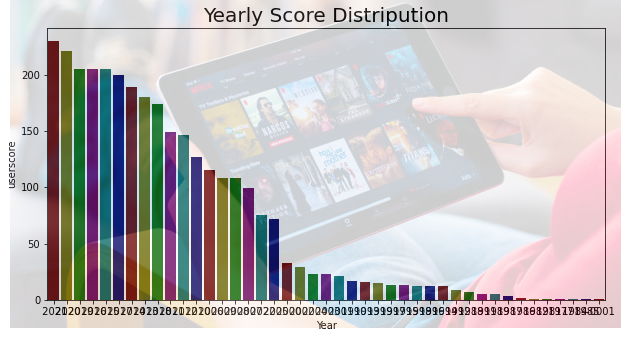

In [18]:
color = ['#800000','#808000','#008000','#800080','#008080','#000080']
fig,ax = plt.subplots(figsize=(10,5))
ax=sns.barplot(x= yearcount['Year'],y=yearcount['userscore'],palette = color)
fig.figimage(im, 10, 10, zorder=3, alpha=.2 )
plt.title('Yearly Score Distripution',fontsize=20)

2021 more userscore

# Whitch year more release

In [19]:
data['Year'].value_counts()

 2021     230
 2020     221
 2016     205
 2015     205
 2019     205
 2017     200
 2014     189
 2013     180
 2018     174
 2011     149
 2012     146
 2010     127
 2006     115
 2009     108
 2008     108
 2007      99
 2022      75
 2005      72
 2000      33
 2002      29
 2004      23
 2003      23
 2001      21
 1990      17
 1993      16
 1999      15
 1997      13
 1995      13
 1998      12
 1994      12
 1996      12
 1992       9
 1988       7
 1989       5
 1991       5
 1987       3
 1986       2
 1981       1
 1984       1
 1982       1
 1985       1
 -0001      1
 1977       1
Name: Year, dtype: int64

Text(0.5, 0, 'year')

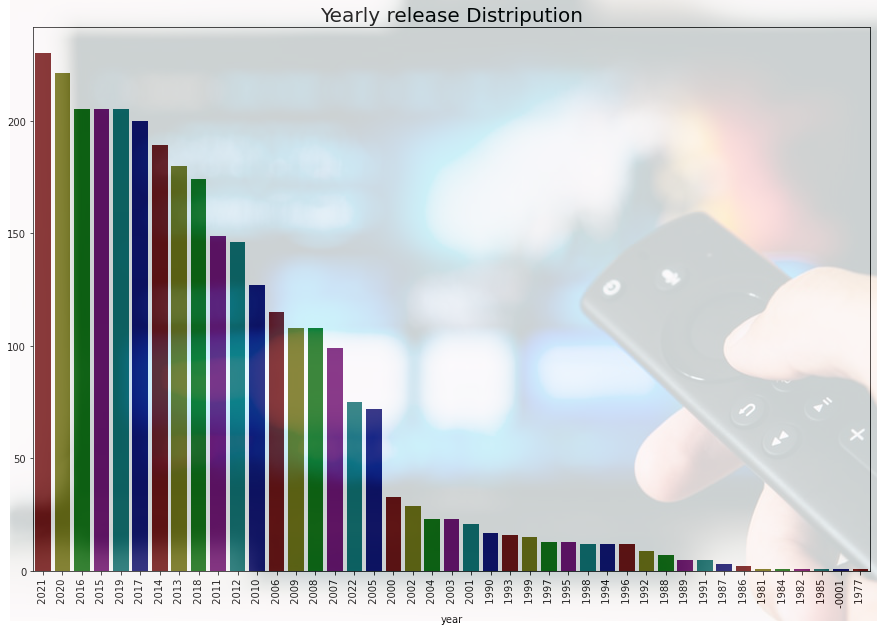

In [20]:
color = ['#800000','#808000','#008000','#800080','#008080','#000080']
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=data['Year'].value_counts().index,y = data['Year'].value_counts().values,palette = color)
fig.figimage(im1, 10, 10, zorder=3, alpha=.2 )
plt.tick_params(axis = 'x',rotation = 90)
plt.title('Yearly release Distripution',fontsize =20)
plt.xlabel('year')

# Whitch title high release

In [21]:
title = data['title'].value_counts().reset_index()
title

,index,title
0,The Golden Globe Awards,3
1,Rollergirls: Season 1,2
2,Rectify: Season 4,1
3,Undercover Boss: Season 1,1
4,Dolly Parton's Heartstrings: Season 1,1
...,...,...
3076,I'll Fly Away: Season 1,1
3077,The Tick (2017): Season 1,1
3078,Downton Abbey: Season 4,1
3079,The Amazing Race: Season 1,1


In [22]:
title = pd.DataFrame(title)

In [23]:
title.columns=(['title','counts'])

In [24]:
title= title.head(10)

Text(0.5, 0, 'year')

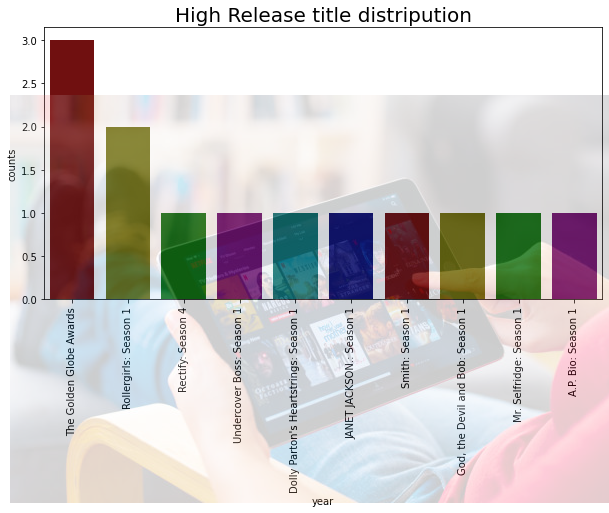

In [25]:
fig,ax = plt.subplots(figsize=(10,5))
ax = sns.barplot(x=title['title'],y = title['counts'],palette = color)
fig.figimage(im, 10, 10, zorder=3, alpha=.2 )
plt.tick_params(axis = 'x',rotation = 90)
plt.title('High Release title distripution',fontsize =20)
plt.xlabel('year')

# Top 10  Title more metascore

In [26]:
titlemetascore = data.groupby('title')['metascore'].sum().reset_index()

In [27]:
titlescore = titlemetascore.sort_values('metascore',ascending = False).head(10)
titlescore

,title,metascore
2382,The Golden Globe Awards,172
1565,Murder One: Season 1,99
2464,The Larry Sanders Show: Season 6,99
362,Breaking Bad: Season 5,99
2462,The Larry Sanders Show: Season 4,99
1847,Rectify: Season 4,99
2567,The Office (UK): Season 1,98
2569,The Office (UK): Season 3,98
324,Bo Burnham: Inside,98
2479,The Leftovers: Season 3,98


Text(0.5, 1.0, 'Top 10 Title metascore')

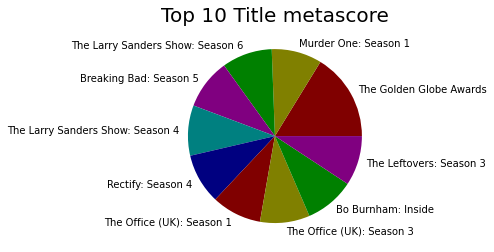

In [28]:
plt.pie(titlescore['metascore'],labels =titlescore['title'],colors = color )
plt.title('Top 10 Title metascore',fontsize = 20)

# Whitch month more release 

In [29]:
month = data['month'].value_counts()

In [30]:
month = pd.DataFrame(month)

In [31]:
month = month.reset_index()
month.columns=['month','counts']

In [32]:
month = month.head(10)

Text(0.5, 1.0, 'top monthly release')

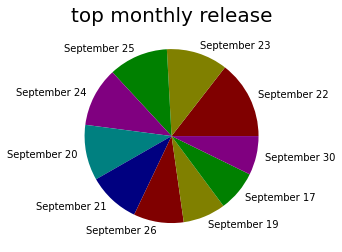

In [33]:
plt.pie(month['counts'],labels = month['month'],colors = color)
plt.title('top monthly release',fontsize = 20)

# TOP 10 user score

In [34]:
user = data['userscore'].value_counts().reset_index()

In [35]:
user.columns=['score','counts']

In [36]:
topuserscore = user.head(10)

Text(0.5, 0, 'Scores')

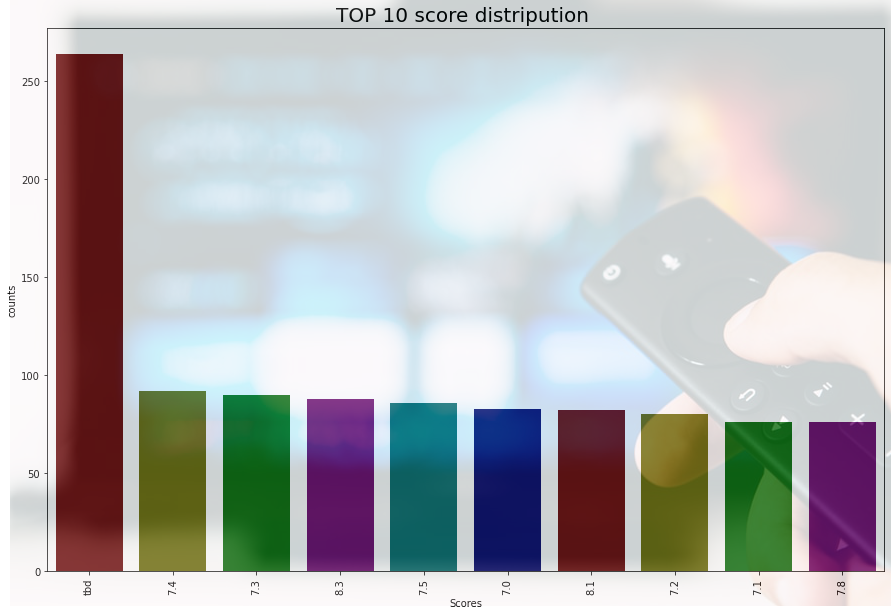

In [37]:
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.barplot(x=topuserscore['score'],y = topuserscore['counts'],palette = color)
fig.figimage(im1, 10, 10, zorder=3, alpha=.2 )
plt.tick_params(axis = 'x',rotation = 90)
plt.title('TOP 10 score distripution ',fontsize =20)
plt.xlabel('Scores')